## Model and ata simulation

In [1]:
import numpy as np

# Simulate the time series input data
def simulate_time_series(timesteps=10, features=4):
    return np.random.rand(timesteps, features)

# Define a simple prediction model that averages the features over the past 4 timesteps
def f_pred(time_series):
    if len(time_series) < 4:
        raise ValueError("Time series data should have at least 4 timesteps.")
    
    # Take the average of the last 4 timesteps for each feature
    return np.mean(time_series[-4:], axis=0)

# Define the mean squared error (MSE) loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate simulated time series data
y = simulate_time_series(timesteps=10, features=4)
y


array([[0.98600786, 0.71656332, 0.76918247, 0.78580982],
       [0.23597207, 0.30541075, 0.72103807, 0.82132949],
       [0.81400739, 0.35898486, 0.6858998 , 0.41355806],
       [0.80967506, 0.11888972, 0.72169724, 0.83636369],
       [0.0126605 , 0.16866818, 0.8835494 , 0.49043494],
       [0.50603086, 0.7485588 , 0.82353338, 0.46648732],
       [0.70697945, 0.38999682, 0.94127518, 0.12278026],
       [0.92053656, 0.56911543, 0.82707328, 0.93204702],
       [0.79745533, 0.53023536, 0.48165862, 0.12177158],
       [0.38093723, 0.31624329, 0.19045917, 0.54562448]])

## MTSexpSHAP

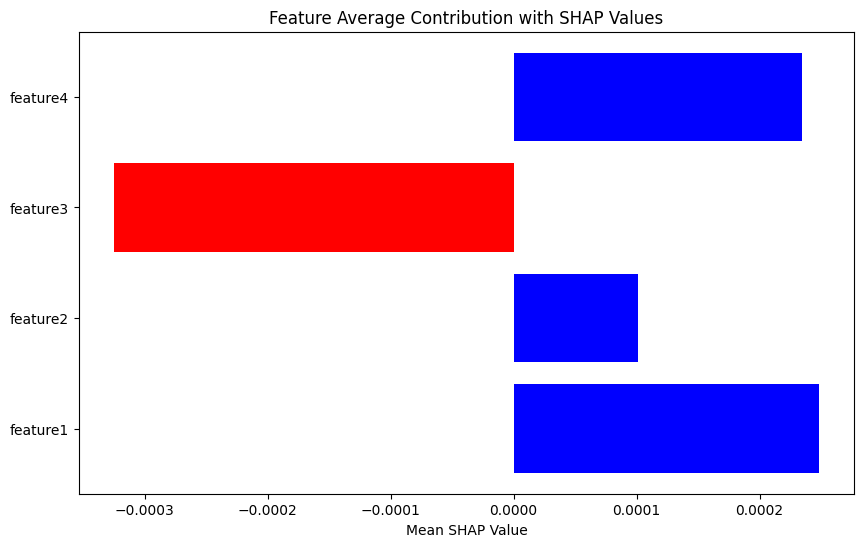

In [2]:
# Initialize the SHAP explainer
from explainers.mtsexpshap import MTSexpSHAP


shap_exp = MTSexpSHAP()
shap_exp.fit_exp(
    model=f_pred,
    loss=mse,
    feature_name_list=['feature1', 'feature2', 'feature3', 'feature4'],
    label_names=['feature2']
)

# Compute SHAP values
shap_values, perturbed_data = shap_exp.shap_values(y)

# Plot SHAP values
shap_exp.plot_shap_values(shap_values)

In [3]:
print("Shapley Values: ", shap_values)

Shapley Values:  [ 0.00024806  0.00010129 -0.00032465  0.00023411]


In [4]:
perturbed_data

array([[0.10011737, 0.25902462, 0.60988294, 0.43038842],
       [0.81030249, 0.01886313, 0.6697074 , 0.81779565],
       [0.35962673, 0.55070407, 0.98180732, 0.90159775],
       [0.8722975 , 0.31083628, 0.51833944, 0.46194146],
       [1.12592852, 0.24139014, 0.80803207, 0.20422504],
       [0.32246104, 0.6322354 , 0.38336256, 0.56315811],
       [0.73655184, 0.64816011, 0.63670313, 0.31625753],
       [0.82860848, 0.04859518, 0.87352259, 0.69011405],
       [0.46198359, 0.25041316, 0.68722598, 0.55481897],
       [0.86441393, 0.53050271, 0.87412777, 0.29086309]])

## MTSexpLIME

In [5]:
# Initialize the LIME explainer
from explainers.mtsexplime import MTSexpLIME


lime_exp = MTSexpLIME()
lime_exp.fit_exp(
    model=f_pred,
    loss=mse,
    features_list_names=['feature1', 'feature2', 'feature3', 'feature4'],
    labels_name=['feature2']
)

In [6]:
best_samples, best_samples_pred, distance_scores, mse_scores = lime_exp.blackbox_evaluation(y)

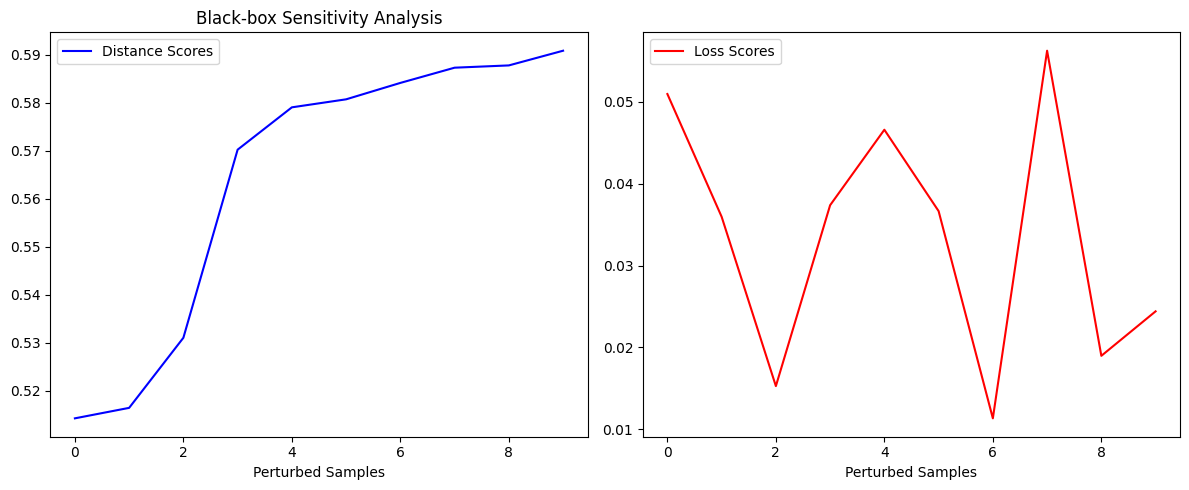

In [7]:
lime_exp.plot_blackbox_evaluation(distance_scores, mse_scores)

In [8]:
best_samples.shape

(10, 10, 4)

In [10]:
fig1, fig2 = lime_exp.average_neighborhood_feature_effect(best_samples, best_samples_pred)

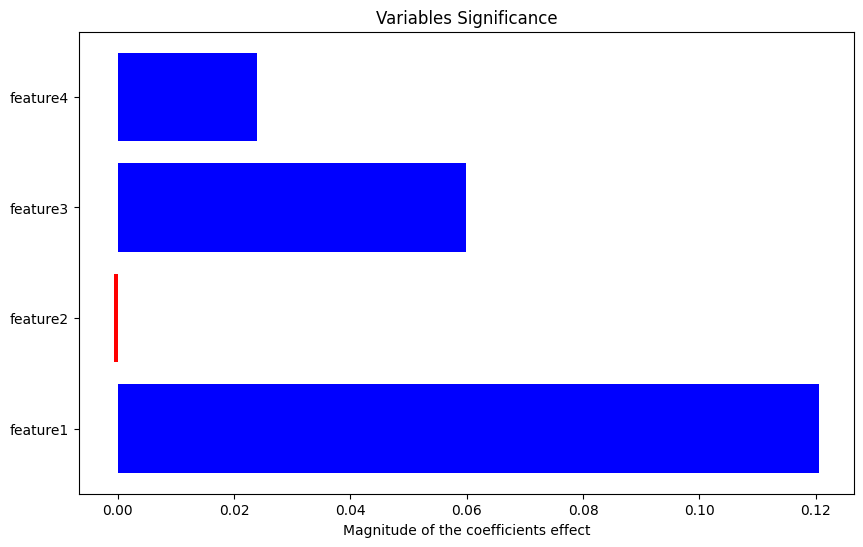

In [11]:
fig1

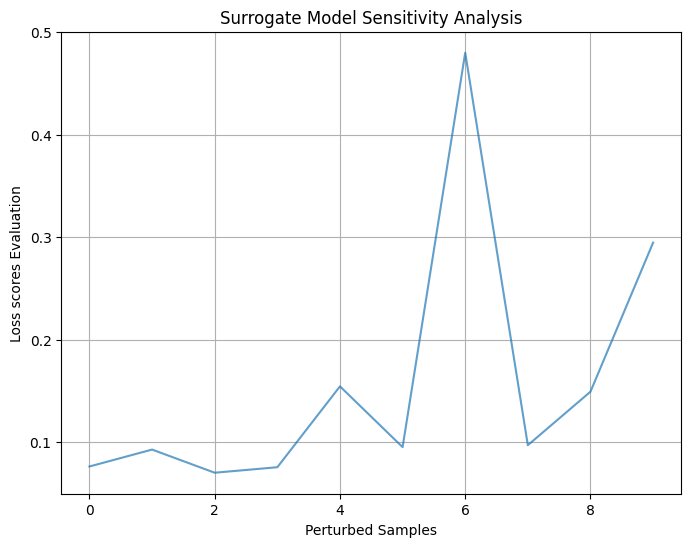

In [12]:
fig2